# Capstone Project AQI to the Death (Sprint 2)
#### Nattawaree Piyarat

Goal for Sprint 2
1. EDA
2. Prepare dataset for Modeling

**Step:**
1. Import necessary libraries.
2. Load dataset and perform EDA.

In [1]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

## TODO - DTALE - DATA Visulization library

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm #used for plotting

In [273]:
df = pd.read_csv('Research Dataset/who_ambient_air_quality.csv')

In [3]:
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.0,NaN,NaN,91.0,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,9890427.0,NaN,13.087840,80.278470,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.0,NaN,NaN,99.0,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,985568.0,NaN,17.659919,75.906391,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.0,NaN,NaN,85.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",9890427.0,NaN,13.087840,80.278470,1
3,3_Sear,IND,India,Hyderabad,2019,version 2022,NaN,42.0,NaN,NaN,87.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",8943523.0,NaN,17.384050,78.456360,1
4,3_Sear,IND,India,Pune,2017,version 2022,NaN,43.0,NaN,NaN,NaN,NaN,NaN,"Central Pollution Control Board India, Environ...",http://www.cpcb.gov.in/CAAQM/,5727530.0,NaN,18.505320,73.823839,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41364 entries, 2018 to 2010
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          41364 non-null  object 
 1   iso3                41364 non-null  object 
 2   country_name        41364 non-null  object 
 3   city                41252 non-null  object 
 4   year                41364 non-null  int64  
 5   version             41219 non-null  object 
 6   pm10_concentration  28177 non-null  float64
 7   pm25_concentration  21566 non-null  float64
 8   no2_concentration   26704 non-null  float64
 9   pm10_tempcov        21344 non-null  float64
 10  pm25_tempcov        16114 non-null  float64
 11  no2_tempcov         22991 non-null  float64
 12  type_of_stations    29459 non-null  object 
 13  reference           40538 non-null  object 
 14  web_link            31983 non-null  object 
 15  population          17161 non-null  float64
 16  populat

In [63]:
# check null value percentage
df.isna().mean()*100

who_region              0.000000
iso3                    0.000000
country_name            0.000000
city                    0.270767
year                    0.000000
version                 0.350546
pm10_concentration     31.880379
pm25_concentration     47.862876
no2_concentration      35.441447
pm10_tempcov           48.399575
pm25_tempcov           61.043419
no2_tempcov            44.417851
type_of_stations       28.781066
reference               1.996906
web_link               22.679141
population             58.512233
population_source     100.000000
latitude                0.601973
longitude               0.609225
who_ms                  0.000000
dtype: float64

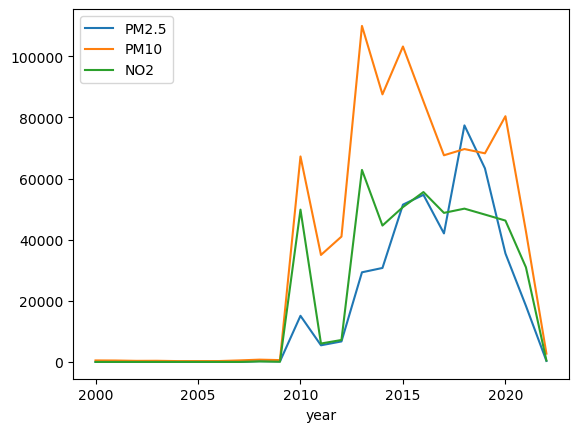

In [5]:
df.groupby(df.year)['pm25_concentration'].sum().plot(kind='line',label='PM2.5')
df.groupby(df.year)['pm10_concentration'].sum().plot(kind='line', label='PM10')
df.groupby(df.year)['no2_concentration'].sum().plot(kind='line', label='NO2')
plt.legend(loc="upper left")
plt.show()

>**Finding**
Since there are no data of PM10, PM2.5, and NO2 before year 2009. So those data should remove.\
And year 2021 -2022 impact by Pandemics so they should remove too

In [276]:
 # Delete all rows with column 'year' < 2009
df.drop(df[df.year < 2009].index, inplace=True)
df.drop(df[df.year >= 2021].index, inplace=True)
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.0,NaN,NaN,91.0,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,9890427.0,NaN,13.087840,80.278470,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.0,NaN,NaN,99.0,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,985568.0,NaN,17.659919,75.906391,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.0,NaN,NaN,85.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",9890427.0,NaN,13.087840,80.278470,1
3,3_Sear,IND,India,Hyderabad,2019,version 2022,NaN,42.0,NaN,NaN,87.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",8943523.0,NaN,17.384050,78.456360,1
4,3_Sear,IND,India,Pune,2017,version 2022,NaN,43.0,NaN,NaN,NaN,NaN,NaN,"Central Pollution Control Board India, Environ...",http://www.cpcb.gov.in/CAAQM/,5727530.0,NaN,18.505320,73.823839,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41339 entries, 0 to 41363
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          41339 non-null  object 
 1   iso3                41339 non-null  object 
 2   country_name        41339 non-null  object 
 3   city                41227 non-null  object 
 4   year                41339 non-null  int64  
 5   version             41194 non-null  object 
 6   pm10_concentration  28152 non-null  float64
 7   pm25_concentration  21561 non-null  float64
 8   no2_concentration   26699 non-null  float64
 9   pm10_tempcov        21339 non-null  float64
 10  pm25_tempcov        16109 non-null  float64
 11  no2_tempcov         22986 non-null  float64
 12  type_of_stations    29434 non-null  object 
 13  reference           40513 non-null  object 
 14  web_link            31958 non-null  object 
 15  population          17136 non-null  float64
 16  populatio

In [277]:
# Drop unnecessory column
df = df.drop(columns=['web_link', 'reference','population_source','pm10_tempcov','pm25_tempcov','no2_tempcov','type_of_stations'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38546 entries, 0 to 41363
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          38546 non-null  object 
 1   iso3                38546 non-null  object 
 2   country_name        38546 non-null  object 
 3   city                38440 non-null  object 
 4   year                38546 non-null  int64  
 5   version             38401 non-null  object 
 6   pm10_concentration  26092 non-null  float64
 7   pm25_concentration  20009 non-null  float64
 8   no2_concentration   24578 non-null  float64
 9   population          16686 non-null  float64
 10  latitude            38299 non-null  float64
 11  longitude           38297 non-null  float64
 12  who_ms              38546 non-null  int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 4.1+ MB


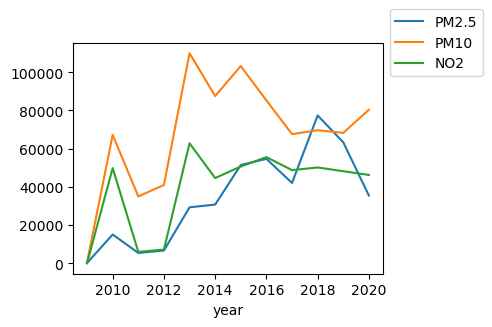

In [278]:
plt.figure(figsize=(4,3))
df.groupby(df.year)['pm25_concentration'].sum().plot(kind='line',label='PM2.5')
df.groupby(df.year)['pm10_concentration'].sum().plot(kind='line', label='PM10')
df.groupby(df.year)['no2_concentration'].sum().plot(kind='line', label='NO2')
plt.legend(loc="center left",
          bbox_to_anchor=(1, 1))
plt.show()

> **Finding**
From above graph PM10 spiked in 2013 and drop since 2017 while PM2.5 increasing.\
But in 2020 PM10 start uptrend. 

In [9]:
# Filter only concerned country
country = ["BGD", "BTN", "IDN","IND","LKA","THA"]
df = df[df['iso3'].isin(country)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1669 entries, 0 to 40445
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          1669 non-null   object 
 1   iso3                1669 non-null   object 
 2   country_name        1669 non-null   object 
 3   city                1664 non-null   object 
 4   year                1669 non-null   int64  
 5   version             1668 non-null   object 
 6   pm10_concentration  1614 non-null   float64
 7   pm25_concentration  371 non-null    float64
 8   no2_concentration   459 non-null    float64
 9   population          1485 non-null   float64
 10  latitude            1554 non-null   float64
 11  longitude           1554 non-null   float64
 12  who_ms              1669 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 182.5+ KB


In [96]:
# check null value percentage
df.isna().mean()*100

who_region             0.000000
iso3                   0.000000
country_name           0.000000
city                   0.290360
year                   0.000000
version                0.058072
pm10_concentration     3.193961
pm25_concentration    75.377468
no2_concentration     70.615563
population            11.440186
latitude               6.678281
longitude              6.678281
who_ms                 0.000000
dtype: float64

In [51]:
# Lat and Lon are not impact to pollutants, so remove the columns
df.dropna(subset=['latitude'], inplace=True)

In [11]:
# check null value percentage
df.isna().mean()*100

who_region             0.000000
iso3                   0.000000
country_name           0.000000
city                   0.064350
year                   0.000000
version                0.064350
pm10_concentration     3.539254
pm25_concentration    78.507079
no2_concentration     77.606178
population             4.440154
latitude               0.000000
longitude              0.000000
who_ms                 0.000000
dtype: float64

Deathrate dataset has no city, so Air dataset should group by country and set mean data to PM25,PM10,NO2

In [11]:
# Deathrate dataset has no city, so Air dataset should group by country and set mean data to PM25,PM10,NO2
df.groupby(['year','iso3'])['pm10_concentration'].mean()

year  iso3
2010  BGD     173.500000
      BTN      47.000000
      IND     176.750000
2011  BGD     139.250000
      BTN      63.250000
      IDN            NaN
      IND     108.451429
      LKA      64.000000
2012  BGD     168.000000
      BTN     105.250000
      IND     104.836842
2013  BGD     129.250000
      BTN      93.250000
      IND     100.829694
      LKA      64.000000
2014  BGD     152.222222
      BTN     109.750000
      IDN            NaN
      IND      95.484536
      THA      44.807692
2015  BGD     141.500000
      BTN     158.500000
      IDN            NaN
      IND     101.168269
      THA      36.000000
2016  BGD     128.333333
      IDN            NaN
      IND     110.178571
      THA      43.500000
2017  BGD     137.000000
      IDN      23.500000
      IND     147.133333
      LKA            NaN
      THA      39.900000
2018  BGD     146.750000
      IDN      24.750000
      IND     113.692308
      LKA            NaN
2019  BGD            NaN
      IDN     

In [28]:
df_a = df.groupby(['year','iso3']).agg({'pm10_concentration':'mean','pm25_concentration':'mean','no2_concentration':'mean'})
# ['pm10_concentration','pm25_concentration','no2_concentration'].apply(lambda x : x.astype(int).sum())

In [31]:
df_a = df_a.reset_index()
df_a.head()

,year,iso3,pm10_concentration,pm25_concentration,no2_concentration
0,2010,BGD,173.50,92.5,NaN
1,2010,BTN,47.00,NaN,NaN
2,2010,IND,176.75,99.0,20.0
3,2011,BGD,139.25,101.5,NaN
4,2011,BTN,63.25,NaN,NaN


In [50]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                45 non-null     int64  
 1   iso3                45 non-null     object 
 2   pm10_concentration  37 non-null     float64
 3   pm25_concentration  33 non-null     float64
 4   no2_concentration   23 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ KB


C:\Users\Nattawaree\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


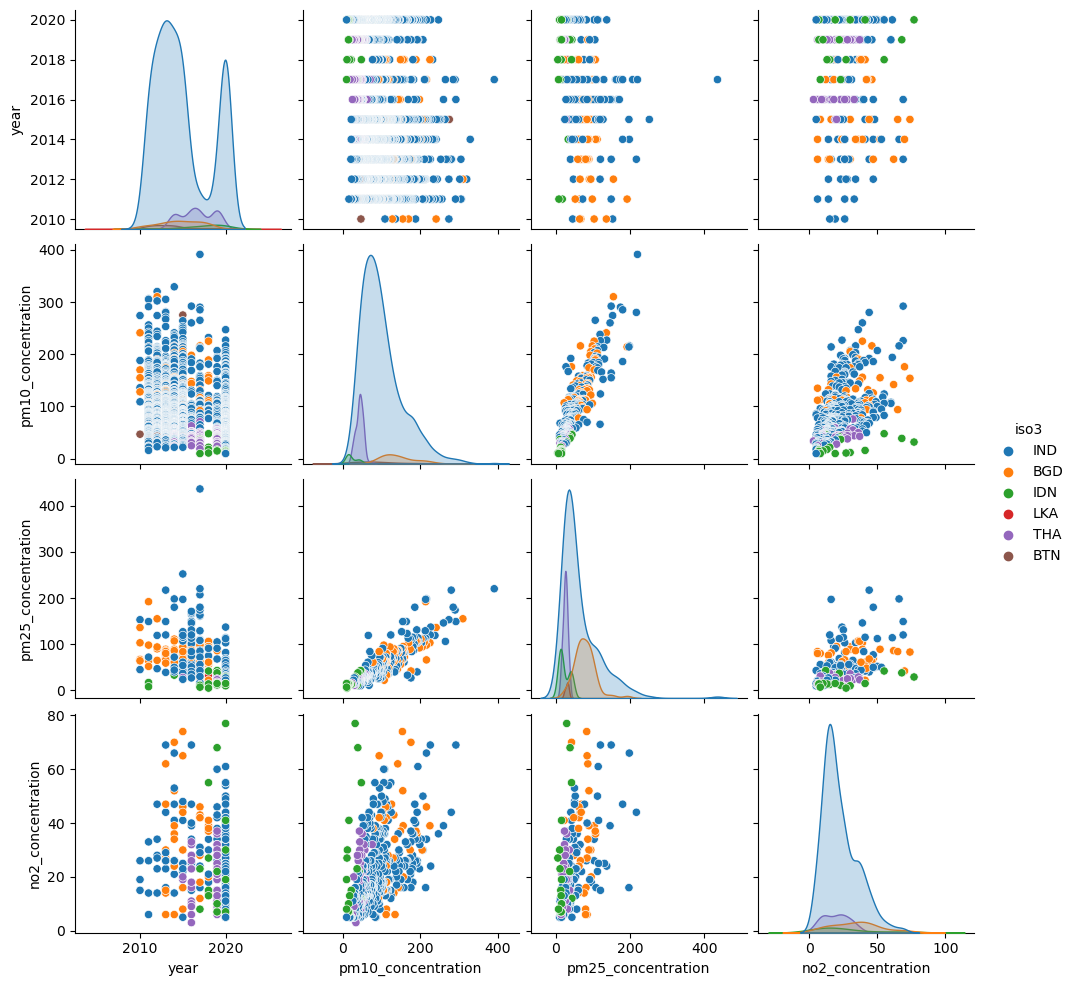

In [51]:
cols_to_plot = ['iso3','year','pm10_concentration','pm25_concentration','no2_concentration']
sns.pairplot(df[cols_to_plot], hue='iso3')

> **Finding**
PM10, PM25, and NO2 looks like they have linear relationship

### View and EDA data of death rate

In [57]:
df_d = pd.read_csv('Research Dataset/Cause of death/Merge 2016-2019.csv')

In [14]:
# view data
df_d.head()

,Code,Cause,Country,iso3,Year,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
0,1140,Stroke,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,120674.90,76.38,2676519.0,1694.00
1,1130,Ischaemic heart disease,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,90632.07,57.36,2216751.0,1403.01
2,30,Tuberculosis,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,61224.00,38.75,2971096.0,1880.44
3,490,Neonatal conditions,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,52495.41,33.22,5453862.0,3451.81
4,1180,Chronic obstructive pulmonary disease,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,39330.24,24.89,1037541.0,656.67


In [41]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Code                               3144 non-null   int64  
 1   Cause                              3144 non-null   object 
 2   Country                            3144 non-null   object 
 3   ISO3                               3144 non-null   object 
 4   Year                               3144 non-null   int64  
 5   Sex                                3144 non-null   object 
 6   Age Group                          3144 non-null   object 
 7   Population                         3144 non-null   int64  
 8   Deaths                             3144 non-null   float64
 9   Death rate per 100 000 population  3144 non-null   float64
 10  DALY                               3144 non-null   float64
 11  DALY rate per 100 000 population   3144 non-null   float

In [15]:
#Check null value
df_d.isna().mean()*100

Code                                 0.0
Cause                                0.0
Country                              0.0
iso3                                 0.0
Year                                 0.0
Sex                                  0.0
Age Group                            0.0
Population                           0.0
Deaths                               0.0
Death rate per 100 000 population    0.0
DALY                                 0.0
DALY rate per 100 000 population     0.0
dtype: float64

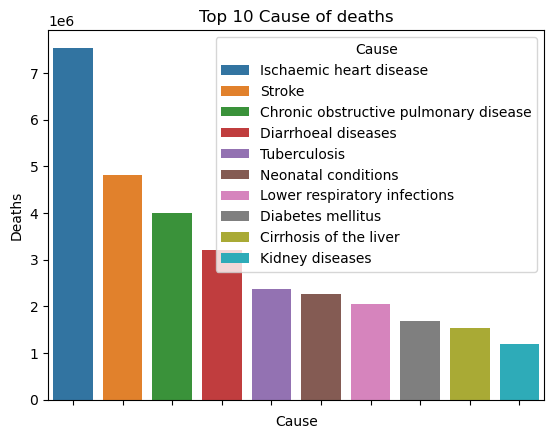

In [16]:
plt.figure()
g = df_d.groupby('Cause', as_index=False)['Deaths'].sum().sort_values(by='Deaths', ascending=False).head(10)
ax = sns.barplot(data=g, x='Cause', y='Deaths', hue='Cause', dodge=False).set(xticklabels=[],title='Top 10 Cause of deaths')

plt.show()


>**Finding** 
Top of decease is Ischaemic heart disease which cause by poor air quality in household.  [Reported by WHO](https://www.who.int/news-room/fact-sheets/detail/household-air-pollution-and-health#:~:text=The%20combined%20effects%20of%20ambient,(COPD)%20and%20lung%20cancer.) \
Chronic obstructive pulmonary might came from air quality also Ischaemic heart disease.



In [72]:
# Merge to main dataset

df_result = pd.merge(df_a, df_d, on=['iso3', 'year'], how='inner')

In [59]:
df_result.sample(10)

,year,iso3,pm10_concentration,pm25_concentration,no2_concentration,Code,Cause,Country,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
1109,2017,THA,39.900000,NaN,NaN,300,Dengue,Thailand,BTSX,ALLAges,69200000,164.35,0.24,15927.23,23.02
1528,2018,IND,113.692308,76.000000,25.750000,60,Chlamydia,India,BTSX,ALLAges,1350000000,375.69,0.03,63846.67,4.73
1332,2018,IDN,24.750000,18.500000,27.500000,620,Mouth and oropharynx cancers,Indonesia,BTSX,ALLAges,268000000,15640.19,5.84,516871.70,192.86
546,2017,BGD,137.000000,54.666667,33.000000,710,Cervix uteri cancer,Bangladesh,BTSX,ALLAges,160000000,4885.60,3.05,180060.00,112.54
1723,2019,BGD,NaN,86.000000,NaN,700,Breast cancer,Bangladesh,BTSX,ALLAges,163000000,6808.05,4.18,234551.00,143.90
954,2017,LKA,NaN,31.000000,NaN,970,Epilepsy,SriLanka,BTSX,ALLAges,21100000,274.14,1.30,39570.63,187.54
900,2017,IND,147.133333,103.800000,24.600000,900,Autism and Asperger syndrome,India,BTSX,ALLAges,1340000000,0.00,0.00,594950.90,44.40
2227,2019,THA,43.516129,24.687500,20.160000,1130,Ischaemic heart disease,Thailand,BTSX,ALLAges,69600000,51305.42,73.71,979744.80,1407.68
2027,2019,IND,102.333333,64.666667,33.750000,1246,Gallbladder and biliary diseases,India,BTSX,ALLAges,1370000000,7566.90,0.55,729351.80,53.24
445,2016,THA,43.500000,NaN,17.916667,1575,Exposure to mechanical forces,Thailand,BTSX,ALLAges,69000000,619.09,0.90,64645.54,93.69


In [60]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               2358 non-null   int64  
 1   iso3                               2358 non-null   object 
 2   pm10_concentration                 1703 non-null   float64
 3   pm25_concentration                 2096 non-null   float64
 4   no2_concentration                  1441 non-null   float64
 5   Code                               2358 non-null   int64  
 6   Cause                              2358 non-null   object 
 7   Country                            2358 non-null   object 
 8   Sex                                2358 non-null   object 
 9   Age Group                          2358 non-null   object 
 10  Population                         2358 non-null   int64  
 11  Deaths                             2358 non-null   float

In [35]:
#Check null value
df_result.isna().mean()*100

year                                  0.000000
iso3                                  0.000000
pm10_concentration                   17.777778
pm25_concentration                   26.666667
no2_concentration                    48.888889
Code                                  0.000000
Cause                                 0.000000
Country                               0.000000
Year                                  0.000000
Sex                                   0.000000
Age Group                             0.000000
Population                            0.000000
Deaths                                0.000000
Death rate per 100 000 population     0.000000
DALY                                  0.000000
DALY rate per 100 000 population      0.000000
dtype: float64

In some country did not keep some type of ingredient such as Bangladesh kept only PM10 and PM2.5 but no NO2 data.
So, the dataset will keep it like that and will be show result as "Cannot analyze" for the paticular gas.

In [131]:
plt.figure()

g = df_result.groupby(['year','Country','Cause']).agg({'Death rate per 100 000 population' : 'mean' , 'pm10_concentration':'mean','pm25_concentration':'mean','no2_concentration':'mean'})
g = g.reset_index()
g

,year,Country,Cause,Death rate per 100 000 population,pm10_concentration,pm25_concentration,no2_concentration
0,2016,Bangladesh,Acute hepatitis A,1.37,128.333333,69.0000,NaN
1,2016,Bangladesh,Acute hepatitis B,0.62,128.333333,69.0000,NaN
2,2016,Bangladesh,Acute hepatitis C,0.12,128.333333,69.0000,NaN
3,2016,Bangladesh,Acute hepatitis E,0.05,128.333333,69.0000,NaN
4,2016,Bangladesh,African trypanosomiasis,0.00,128.333333,69.0000,NaN
...,...,...,...,...,...,...,...
2353,2019,Thailand,Upper respiratory infections,0.03,43.516129,24.6875,20.16
2354,2019,Thailand,Urolithiasis,0.66,43.516129,24.6875,20.16
2355,2019,Thailand,Vitamin A deficiency,0.00,43.516129,24.6875,20.16
2356,2019,Thailand,Whooping cough,0.11,43.516129,24.6875,20.16


<Figure size 640x480 with 0 Axes>


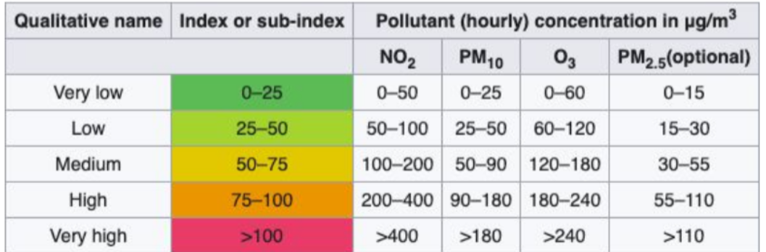

Unheathy value of PM2.5 > 55.\
Unheathy value of PM10 > 90.\
Unheathy value of NO2 > 200

Then, change to value of each pollutant (0 means healthy, 1 means unhealthy)

In [239]:
df_result['PM25_Poor'] = np.where(df_result['pm25_concentration'] > 55, 1, 0)
df_result['PM10_Poor'] = np.where(df_result['pm10_concentration'] > 90, 1, 0)
df_result['NO2_Poor'] = np.where(df_result['no2_concentration'] > 200, 1, 0)
df_result['Unhealthy'] = np.where(df_result['PM25_Poor'] | df_result['PM10_Poor'] | df_result['NO2_Poor'] ,1,0)
df_result.sample(10)

,year,iso3,pm10_concentration,pm25_concentration,no2_concentration,Code,Cause,Country,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population,PM25_Poor,PM10_Poor,NO2_Poor,Death_rate,Unhealthy
547,2017,BGD,137.000000,54.666667,33.000000,752,Gallbladder and biliary tract cancer,Bangladesh,BTSX,ALLAges,160000000,4706.16,2.94,151641.30,94.78,0,1,0,0.0029,1
2253,2019,THA,43.516129,24.687500,20.160000,640,Stomach cancer,Thailand,BTSX,ALLAges,69600000,3450.71,4.96,96649.24,138.86,0,0,0,0.0050,0
34,2016,BGD,128.333333,69.000000,NaN,660,Liver cancer,Bangladesh,BTSX,ALLAges,158000000,2556.43,1.62,82328.97,52.11,1,1,0,0.0016,1
1262,2018,BGD,146.750000,71.875000,32.285714,260,Leishmaniasis,Bangladesh,BTSX,ALLAges,161000000,56.67,0.04,3908.33,2.43,1,1,0,0.0000,1
341,2016,IND,110.178571,83.852941,33.800000,1290,Urolithiasis,India,BTSX,ALLAges,1320000000,1625.42,0.12,105317.70,7.98,1,1,0,0.0001,1
2319,2019,THA,43.516129,24.687500,20.160000,1050,Uncorrected refractive errors,Thailand,BTSX,ALLAges,69600000,0.00,0.00,226243.40,325.06,0,0,0,0.0000,0
2070,2019,IND,102.333333,64.666667,33.750000,250,Schistosomiasis,India,BTSX,ALLAges,1370000000,0.00,0.00,0.00,0.00,1,1,0,0.0000,1
842,2017,IND,147.133333,103.800000,24.600000,1240,Appendicitis,India,BTSX,ALLAges,1340000000,11101.14,0.83,450547.90,33.62,1,1,0,0.0008,1
1444,2018,IND,113.692308,76.000000,25.750000,1140,Stroke,India,BTSX,ALLAges,1350000000,682093.50,50.53,17500000.00,1296.30,1,1,0,0.0505,1
297,2016,IND,110.178571,83.852941,33.800000,420,Maternal conditions,India,BTSX,ALLAges,1320000000,32689.96,2.48,2318293.00,175.63,1,1,0,0.0025,1


In [150]:
df_result['Death_rate'] = np.round(df_result['Deaths']/df_result['Population']*100,4)
df_result.sample(10)

,year,iso3,pm10_concentration,pm25_concentration,no2_concentration,Code,Cause,Country,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population,PM25_Poor,PM10_Poor,NO2_Poor,Death_rate
1725,2019,BGD,NaN,86.000000,NaN,1610,Self-harm,Bangladesh,BTSX,ALLAges,163000000,5997.85,3.68,321210.00,197.06,1,0,0,0.0037
349,2016,IND,110.178571,83.852941,33.800000,295,Echinococcosis,India,BTSX,ALLAges,1320000000,350.14,0.03,22868.87,1.73,1,1,0,0.0000
1270,2018,BGD,146.750000,71.875000,32.285714,830,Depressive disorders,Bangladesh,BTSX,ALLAges,161000000,0.00,0.00,1285345.00,798.35,1,1,0,0.0000
1973,2019,IND,102.333333,64.666667,33.750000,1230,Cirrhosis of the liver,India,BTSX,ALLAges,1370000000,268579.90,19.60,9638010.00,703.50,1,1,0,0.0196
1492,2018,IND,113.692308,76.000000,25.750000,186,Acute hepatitis A,India,BTSX,ALLAges,1350000000,14736.67,1.09,939892.60,69.62,1,1,0,0.0011
1510,2018,IND,113.692308,76.000000,25.750000,1241,Gastritis and duodenitis,India,BTSX,ALLAges,1350000000,3464.25,0.26,524485.20,38.85,1,1,0,0.0003
1053,2017,THA,39.900000,NaN,NaN,660,Liver cancer,Thailand,BTSX,ALLAges,69200000,22701.95,32.81,641689.70,927.30,0,0,0,0.0328
1618,2018,LKA,NaN,32.000000,NaN,752,Gallbladder and biliary tract cancer,SriLanka,BTSX,ALLAges,21200000,157.46,0.74,3840.80,18.12,0,0,0,0.0007
1431,2018,IDN,24.750000,18.500000,27.500000,1310,Infertility,Indonesia,BTSX,ALLAges,268000000,0.00,0.00,288900.60,107.80,0,0,0,0.0000
951,2017,LKA,NaN,31.000000,NaN,750,Bladder cancer,SriLanka,BTSX,ALLAges,21100000,386.76,1.83,8269.61,39.19,0,0,0,0.0018


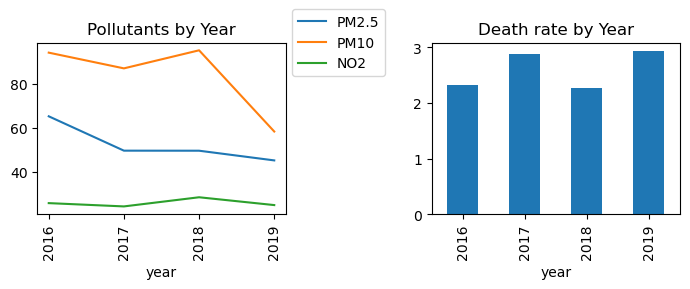

In [270]:

plt.subplots(1, 2, figsize=(7,3)) 
plt.subplot(1, 2, 1)
df_result.groupby(df_result.year)['pm25_concentration'].mean().plot(kind='line',label='PM2.5')
df_result.groupby(df_result.year)['pm10_concentration'].mean().plot(kind='line', label='PM10')
df_result.groupby(df_result.year)['no2_concentration'].mean().plot(kind='line', label='NO2',title='Pollutants by Year')
plt.xticks(rotation=90)
plt.legend(loc="center left",
          bbox_to_anchor=(1, 1))


plt.subplot(1, 2, 2)
agr_df = df_result[df_result['Cause']=='Ischaemic heart disease']
df_result.groupby(df_result.year)['Death_rate'].sum().plot(kind='bar', label='Death',title='Death rate by Year')
plt.tight_layout()
plt.show()

> **Observation**
Observation 2019 pollutants tend to reduce but the death rate increases which can assume that the pollution was not impact immediately but needs some years to be affected.

### Modeling
1. Linear Regression
2. Logistic Regression
3. Decision tree (not in this sprint)
4. Time Series (not in this sprint)


In [182]:
# Drop non-numeric columns
X = df_result.drop(['iso3','Code', 'Cause','Country','Sex','Age Group'],axis=1)
y = df_result['Death_rate'].copy()

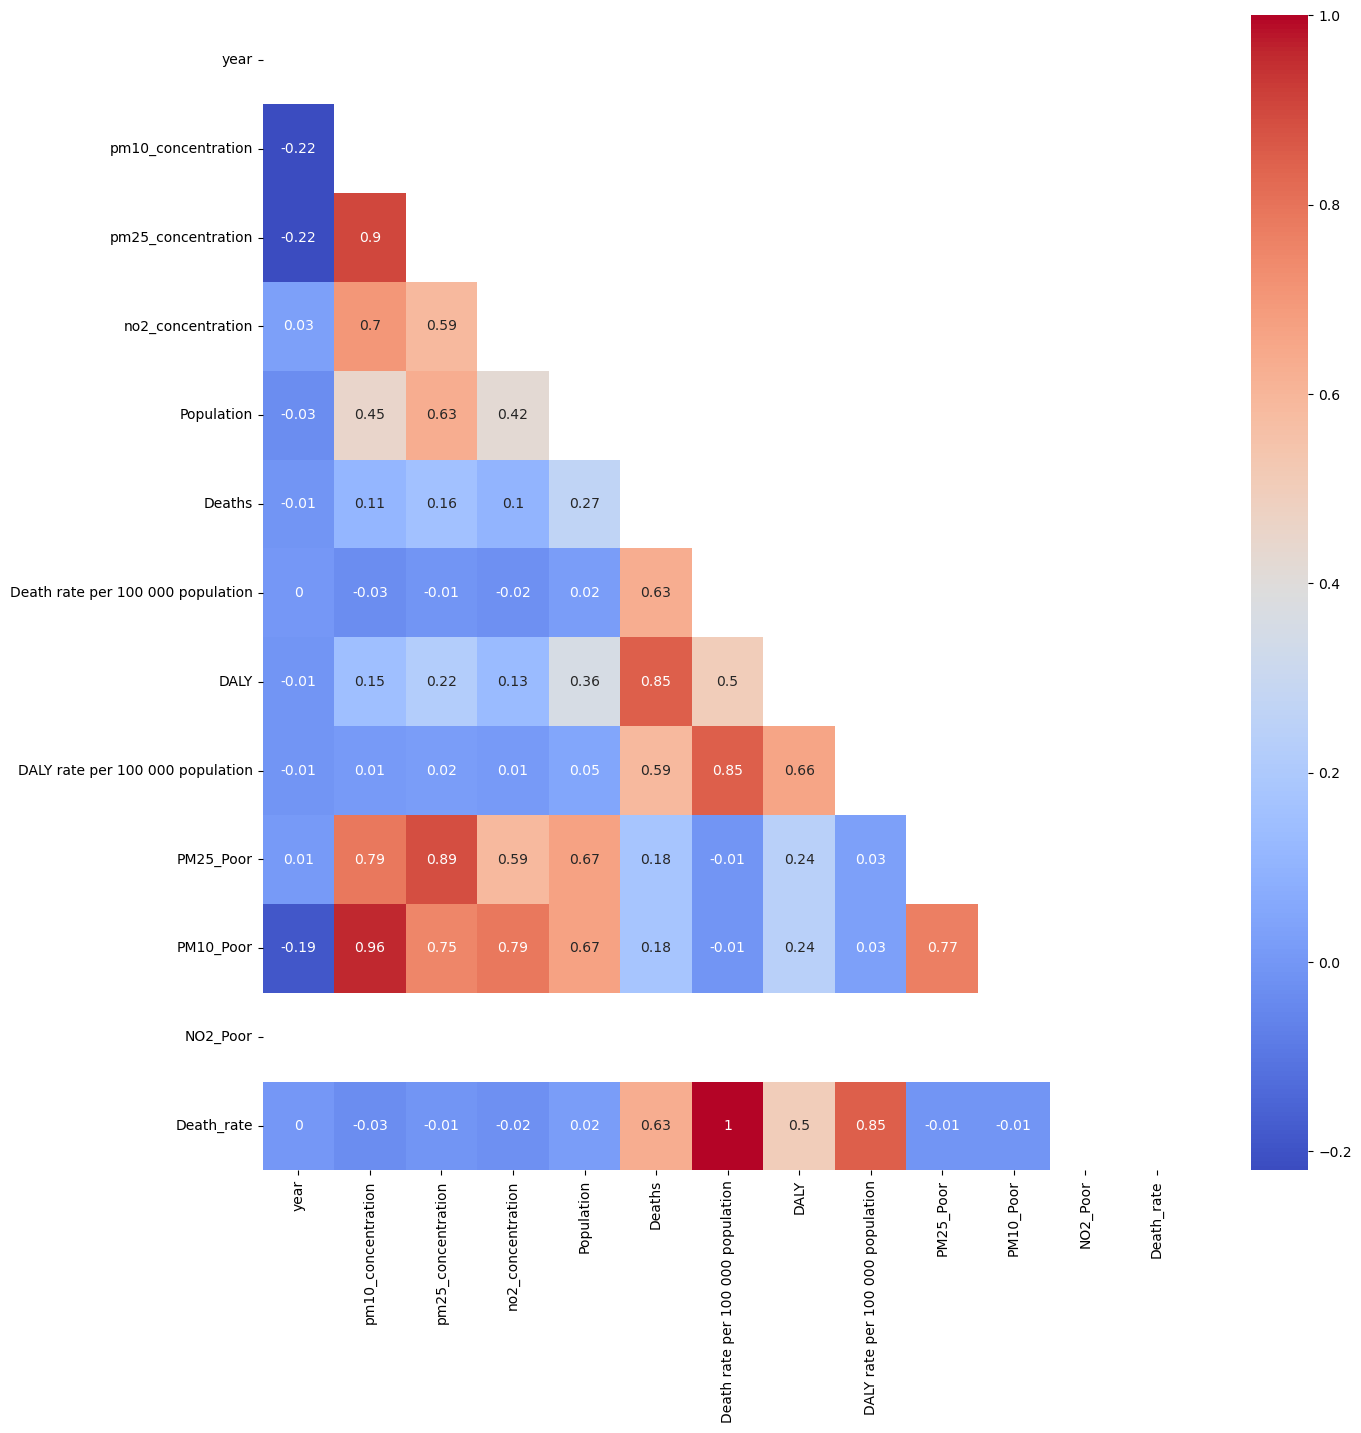

In [183]:
# Create heatmap show correlation of each columns.
correlation = X.corr()
mask = np.triu(correlation)
plt.figure(figsize=(15,15))
sns.heatmap(correlation.round(2), mask=mask, annot=True, cmap='coolwarm')
plt.show()

> **Finding**
From the heatmap and results, only numeric columns
Correlations between PM10 and PM2.5 and NO2 are strong positive.

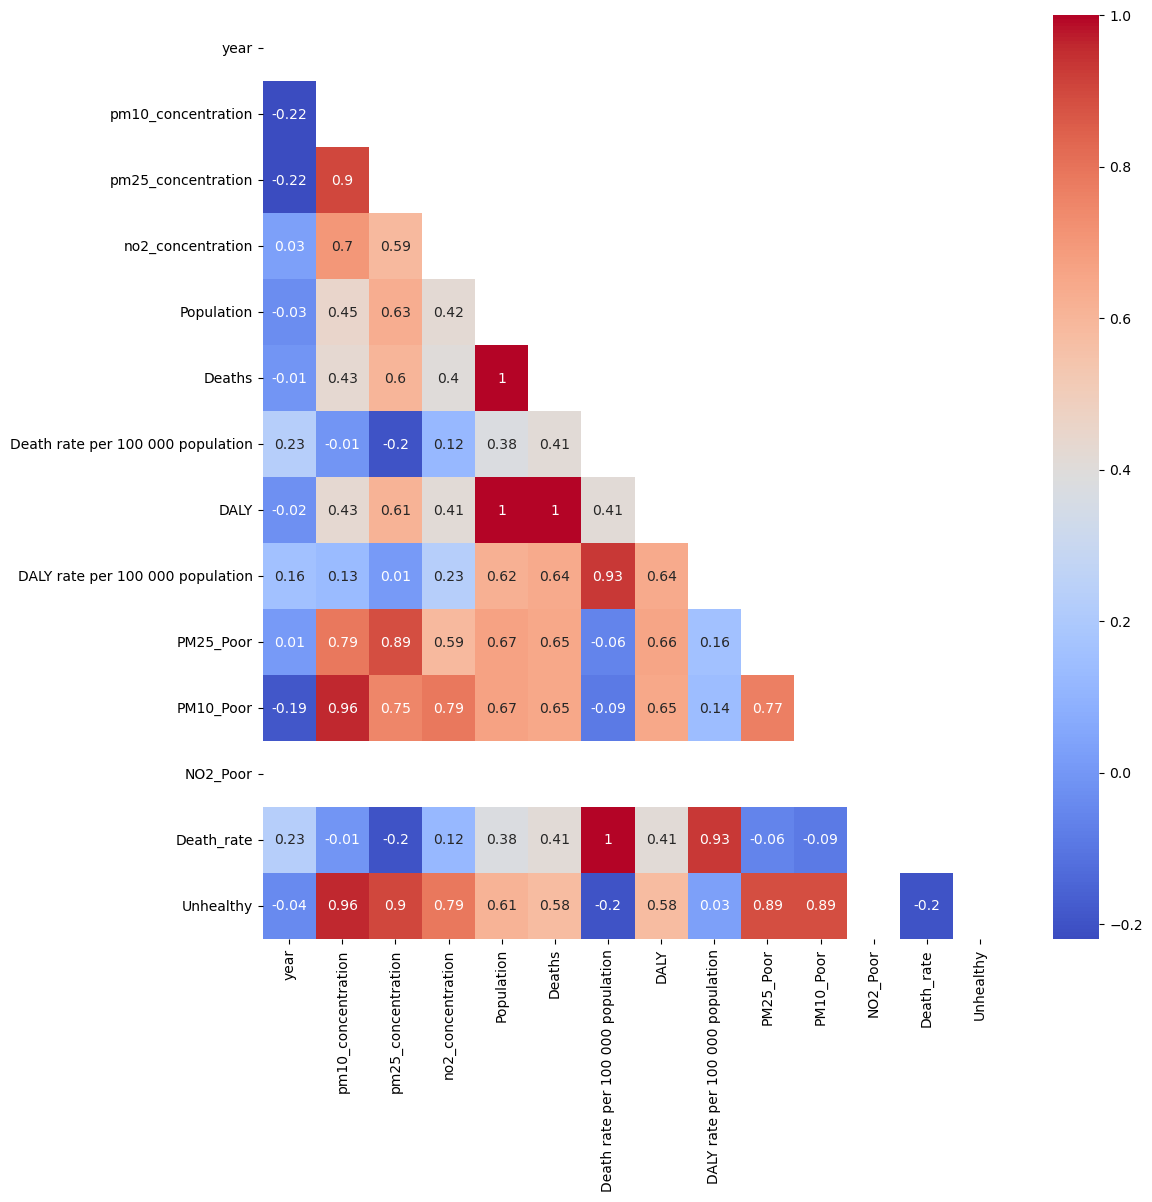

In [281]:
agr_df = df_result[df_result['Cause']=='Ischaemic heart disease']
# Drop non-numeric columns
X = agr_df.drop(['iso3','Code', 'Cause','Country','Sex','Age Group'],axis=1)
# y = agr_df['Death_rate'].copy()
# Create heatmap show correlation of each columns.
correlation = X.corr()
mask = np.triu(correlation)
plt.figure(figsize=(12,12))
sns.heatmap(correlation.round(2), mask=mask, annot=True, cmap='coolwarm')
plt.show()

Now, focus only 'Ischaemic heart disease' which is the top 1 of cause of death.\
And WHO explain that the cause came from household air pollution which the top of outdoor air pollutions.

Seems correlation between Death rate higher when compare with the pollutants (PM10, PM2.5,NO2)

C:\Users\Nattawaree\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



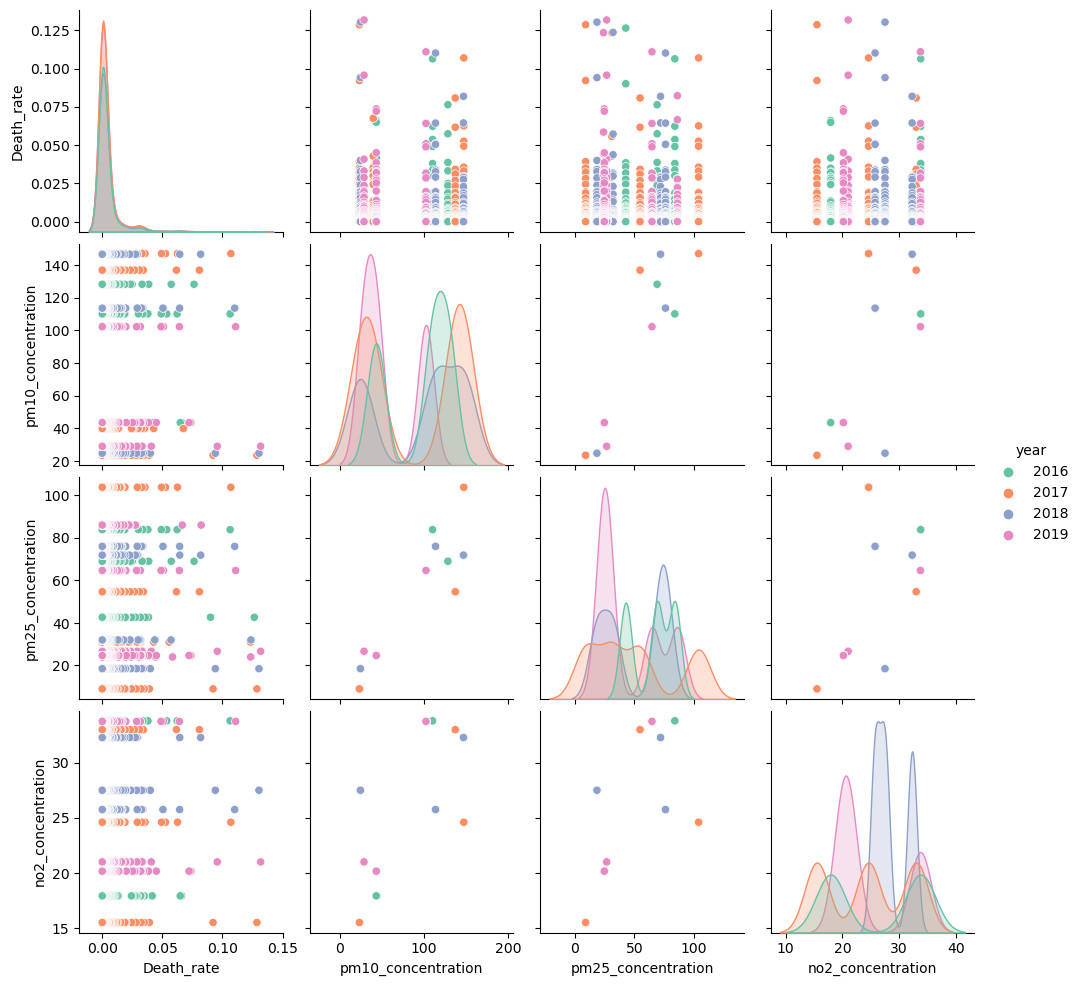

In [196]:
cols_to_plot = ['year','Death_rate','pm10_concentration','pm25_concentration','no2_concentration']
sns.pairplot(df_result[cols_to_plot], hue='year',palette='Set2')


In [202]:
df_result_m = pd.get_dummies(df_result,columns=['Country'], dtype=int)

In [206]:
df_result_m = df_result_m.drop(['iso3','Code', 'Cause','Sex','Age Group'],axis=1)

In [209]:
df_result_m

,year,pm10_concentration,pm25_concentration,no2_concentration,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population,PM25_Poor,PM10_Poor,NO2_Poor,Death_rate,Country_Bangladesh,Country_India,Country_Indonesia,Country_SriLanka,Country_Thailand
0,2016,128.333333,69.0000,NaN,158000000,120674.90,76.38,2676519.00,1694.00,1,1,0,0.0764,1,0,0,0,0
1,2016,128.333333,69.0000,NaN,158000000,90632.07,57.36,2216751.00,1403.01,1,1,0,0.0574,1,0,0,0,0
2,2016,128.333333,69.0000,NaN,158000000,61224.00,38.75,2971096.00,1880.44,1,1,0,0.0387,1,0,0,0,0
3,2016,128.333333,69.0000,NaN,158000000,52495.41,33.22,5453862.00,3451.81,1,1,0,0.0332,1,0,0,0,0
4,2016,128.333333,69.0000,NaN,158000000,39330.24,24.89,1037541.00,656.67,1,1,0,0.0249,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,2019,43.516129,24.6875,20.16,69600000,0.00,0.00,0.00,0.00,0,0,0,0.0000,0,0,0,0,1
2354,2019,43.516129,24.6875,20.16,69600000,0.72,0.00,211.08,0.30,0,0,0,0.0000,0,0,0,0,1
2355,2019,43.516129,24.6875,20.16,69600000,3.41,0.00,2892.88,4.16,0,0,0,0.0000,0,0,0,0,1
2356,2019,43.516129,24.6875,20.16,69600000,0.00,0.00,3490.29,5.01,0,0,0,0.0000,0,0,0,0,1


**Linear Regression**

In [211]:
X = df_result_m['PM10_Poor'] # Set only Year as independent variable
y = df_result_m['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     76.59
Date:                Mon, 06 May 2024   Prob (F-statistic):           3.94e-18
Time:                        16:42:28   Log-Likelihood:                -30236.
No. Observations:                2358   AIC:                         6.048e+04
Df Residuals:                    2356   BIC:                         6.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6360.9109   2362.815      2.692      0.007    1727.498     1.1e+04
PM10_Poor   3.316e+04   3788.933      8.751      0.000    2.57e+04    4.06e+04
==============================================================================
Omnibus:                     3707.462   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1654046.754
Skew:                           9.973   Prob(JB):                         0.00
Kurtosis:                     131.208   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
X = df_result_m['PM25_Poor'] # Set only Year as independent variable
y = df_result_m['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     76.71
Date:                Mon, 06 May 2024   Prob (F-statistic):           3.71e-18
Time:                        16:43:37   Log-Likelihood:                -30236.
No. Observations:                2358   AIC:                         6.048e+04
Df Residuals:                    2356   BIC:                         6.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6351.1732   2362.757      2.688      0.007    1717.874     1.1e+04
PM25_Poor   3.318e+04   3788.840      8.758      0.000    2.58e+04    4.06e+04
==============================================================================
Omnibus:                     3707.503   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1654197.626
Skew:                           9.973   Prob(JB):                         0.00
Kurtosis:                     131.214   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
X = df_result_m['NO2_Poor'] # Set only Year as independent variable
y = df_result_m['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

C:\Users\Nattawaree\Documents\Anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning:

divide by zero encountered in scalar divide



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 06 May 2024   Prob (F-statistic):                nan
Time:                        16:43:50   Log-Likelihood:                -30274.
No. Observations:                2358   AIC:                         6.055e+04
Df Residuals:                    2357   BIC:                         6.055e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.926e+04   1876.481     10.262      0.000    1.56e+04    2.29e+04
NO2_Poor            0          0        nan        nan           0           0
==============================================================================
Omnibus:                     3729.738   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1665643.438
Skew:                          10.101   Prob(JB):                         0.00
Kurtosis:                     131.627   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [216]:
X = df_result_m[['PM10_Poor','PM25_Poor']] # Set only Year as independent variable
y = df_result_m['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     43.56
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.64e-19
Time:                        16:44:28   Log-Likelihood:                -30231.
No. Observations:                2358   AIC:                         6.047e+04
Df Residuals:                    2355   BIC:                         6.048e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4648.7114   2418.122      1.922      0.055     -93.157    9390.580
PM10_Poor   1.873e+04   5885.072      3.182      0.001    7186.619    3.03e+04
PM25_Poor   1.883e+04   5885.072      3.200      0.001    7293.733    3.04e+04
==============================================================================
Omnibus:                     3704.842   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1653057.966
Skew:                           9.958   Prob(JB):                         0.00
Kurtosis:                     131.173   Cond. No.                         5.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Consider only PM10 R^2 is 0.031\
Consider only PM2.5 R^2 is 0.032\
Consider only NO2 R^2 is 0 (Seems the NO2 does not has correlation with the death rate by linear regression)\
Consider PM10 and PM2.5 R^2 is increase to 0.36

In [240]:
# Let see only the top decease
df_result_ihd = df_result[df_result['Cause']=='Ischaemic heart disease']
pd.get_dummies(df_result_ihd,columns=['Country'], dtype=int)

df_result_ihd = df_result_ihd.drop(['iso3','Code', 'Cause','Sex','Age Group'],axis=1)

In [223]:
X = df_result_ihd[['PM10_Poor','PM25_Poor']] # Set only Year as independent variable
y = df_result_ihd['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

C:\Users\Nattawaree\Documents\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     7.025
Date:                Mon, 06 May 2024   Prob (F-statistic):            0.00703
Time:                        16:50:42   Log-Likelihood:                -258.01
No. Observations:                  18   AIC:                             522.0
Df Residuals:                      15   BIC:                             524.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.069e+04   1.38e+05      0.586      0.566   -2.13e+05    3.74e+05
PM10_Poor   4.243e+05   3.35e+05      1.267      0.225    -2.9e+05    1.14e+06
PM25_Poor   4.341e+05   3.35e+05      1.296      0.215    -2.8e+05    1.15e+06
==============================================================================
Omnibus:                        1.743   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.115
Skew:                          -0.601   Prob(JB):                        0.573
Kurtosis:                       2.800   Cond. No.                         5.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>**Finding**
After filter only 'Ischaemic heart disease' the R^2 increase to 0.484 \
So, it can assume that the PM10 and PM2.5 are strong correlation with death from 'Ischaemic heart disease'

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [231]:
# 1. Instantiate the model
linear_regression_model = LinearRegression() 

# 2. Fit the model
linear_regression_model.fit(X, y)

#The intercept
intercept = linear_regression_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = linear_regression_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: 80685.16154411779
Coefficients: 434107.98301470553


In [229]:
# Step 3 prediction
model_prediction = linear_regression_model.predict(X)

In [230]:
# Evaluate the model
print(f'The R2 score: {r2_score(y, model_prediction)}')

The R2 score: 0.4836356819339481


In [253]:
df_result_ihd.isna().mean()*100

year                                  0.000000
pm10_concentration                   27.777778
pm25_concentration                   11.111111
no2_concentration                    38.888889
Country                               0.000000
Population                            0.000000
Deaths                                0.000000
Death rate per 100 000 population     0.000000
DALY                                  0.000000
DALY rate per 100 000 population      0.000000
PM25_Poor                             0.000000
PM10_Poor                             0.000000
NO2_Poor                              0.000000
Death_rate                            0.000000
Unhealthy                             0.000000
dtype: float64

In [261]:
df_result_ihd = df_result_ihd.fillna(0)

**Logistic Regression**

1. Change X to concentration of PM10, PM2.5 and NO2
2. y is Unhealthy indecator which derived from pollutants poor indicator

In [288]:
X = df_result_ihd[['pm10_concentration','pm25_concentration','no2_concentration']] 
y = df_result_ihd['Unhealthy'].copy()

In [289]:
# 1. Instantiate the model
logit_regression_model = LogisticRegression() 

# 2. Fit the model
logit_regression_model.fit(X, y)

#The intercept
intercept = logit_regression_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = logit_regression_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [-16.41761639]
Coefficients: [0.07302021 0.25337738 0.00293411]


In [290]:
# Step 3 prediction
model_prediction = logit_regression_model.predict(X)
# Evaluate the model
print(f'The R2 score: {r2_score(y, model_prediction)}')

The R2 score: 1.0


>**Finding**
High pollutants concentation have strong correlation with Unhealthy indicator because the unhealthy indicator came form those 3 features (pollutants)\
By the way, this dataset df_result_ihd will be a baseline version but if found some better dataset I might change the baseline.

### Next step
1. As the pollution takes time for affect decease and death but they are significant to death rate. So, next will be focus pollutants predict each others.
2. Find more dataset which has more pollutants and AQI data.
3. Build more model to analyze.
4. Project summarize.